# Aula 8 - Curva ROC

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Revisitando Matriz de Confusão 
- 2) Taxa de Verdadeiros Positivos e Falso Positivo
- 3) Especificidade e Sensibilidade
- 4) ROC
- 5) Sob a Curva ROC

### Matriz de confusão

![](https://assets-global.website-files.com/6266b596eef18c1931f938f9/644aec2628bc14d83ca873a2_class_guide_cm10.png)

 - Precision (Especificidade) = TP / (TP+FP)
    - Doença rara
 - Recall (Sensibilidade) = TP / (TP+FN)
    - Doença contagiosa
 - F1 = 2 * (precision * recall) / (precision + recall)
    - Equilíbrio entre Sensibilidade e Especificidade 


#### Taxas de Verdadeiros Positivos & Falsos positivos

![](https://assets-global.website-files.com/6266b596eef18c1931f938f9/6476048c709e42795423b3a1_classification_metrics_004-min.png)

`Fonte`:https://www.evidentlyai.com/classification-metrics/explain-roc-curve

## Curva ROC-AUC

Veremos agora uma outra métrica de avaliação de modelos de classificação, que é a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

### Exemplos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Divisão de treino e teste

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [17]:
from sklearn import metrics

def test_model_plot_roc_auc_curve(model_list, 
                                  X_train, 
                                  X_test, 
                                  y_train, 
                                  y_test):
    
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        probas = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, probas)
        
        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
        auc = metrics.roc_auc_score(y_test, y_pred)
        
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))
        print(f"====|Modelo:{model_name}|=====")
        print(f"Accuracy:{accuracy}")
        print(f"Precision:{precision}")
        print(f"Recall:{recall}")
        print(f"F1-Score:{f1_score}")
        print(f"ROC-AUC:{auc}")
        print('=========================')
        
        
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


list_models = [
    {
        "model_name":"LogisticRegression",
        "estimator" :LogisticRegression(random_state=10)
    },
    {
        "model_name":"Decision Tree",
        "estimator" :DecisionTreeClassifier(random_state=10)
    },
    {
        "model_name":'RandomForest',
        "estimator" : RandomForestClassifier(random_state=10)        
    },
    {
        "model_name":'AdaBoost',
        "estimator" : AdaBoostClassifier(random_state=10)        
    },
    {
        "model_name":'GradientBoost',
        "estimator" : GradientBoostingClassifier(random_state=10)        
    },
    {
        "model_name":'XGBoost',
        "estimator" : XGBClassifier(random_state=10)        
    },
    {
        "model_name":'LightGBM',
        "estimator" : LGBMClassifier(random_state=10)        
    }
]

====|Modelo:LogisticRegression|=====
Accuracy:0.8
Precision:0.7969429747207525
Recall:0.8
F1-Score:0.7980414746543778
ROC-AUC:0.7620124364047484
====|Modelo:Decision Tree|=====
Accuracy:0.8111111111111111
Precision:0.8073450854700854
Recall:0.8111111111111111
F1-Score:0.8082262626262626
ROC-AUC:0.7702091577162238
====|Modelo:RandomForest|=====
Accuracy:0.8333333333333334
Precision:0.8350000000000001
Recall:0.8333333333333334
F1-Score:0.8340570574777045
ROC-AUC:0.813736574335783
====|Modelo:AdaBoost|=====
Accuracy:0.8
Precision:0.8
Recall:0.8
F1-Score:0.8
ROC-AUC:0.7710570944036179
====|Modelo:GradientBoost|=====
Accuracy:0.8111111111111111
Precision:0.8129629629629629
Recall:0.8111111111111111
F1-Score:0.8119313318080652
ROC-AUC:0.7882984737139627
====|Modelo:XGBoost|=====
Accuracy:0.8555555555555555
Precision:0.8533119658119658
Recall:0.8555555555555555
F1-Score:0.8533494949494949
ROC-AUC:0.8210853589598643
[LightGBM] [Info] Number of positive: 67, number of negative: 142
[LightGBM] [

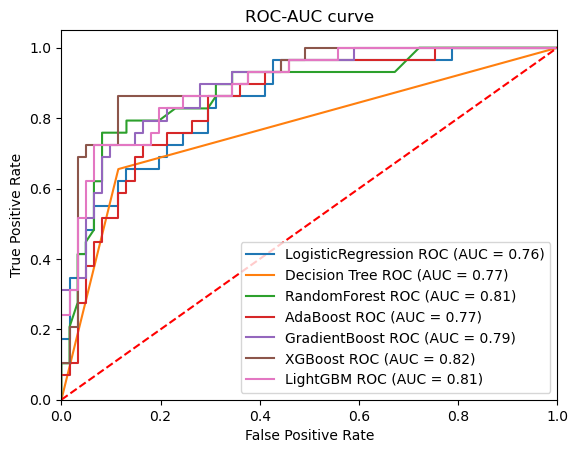

In [19]:
pipeline_response = test_model_plot_roc_auc_curve(list_models, X_train, X_test, y_train, y_test)
pipeline_response

## Exercícios

__1)__ Realize uma classificação com da coluna y dos dados de marketing bancário (contido no arquivo `bank-full.csv`) utilizando mais de um modelo dentro dos modelos conhecidos por vocês. Qual o melhor modelo a ser implementado?

__2)__ Com os dados do arquivo `Admission_Predict.csv` realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado.

## 